In [1]:
#pandas for data manipulation and matplotlib for visualization
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#import each csv as a pandas dataframe
cfs_2019 = pd.read_csv('/Users/daniellicht/Downloads/Calls_for_Service_2019.csv')
cfs_2020 = pd.read_csv('/Users/daniellicht/Downloads/Call_for_Service_2020.csv')
cfs_2021 = pd.read_csv('/Users/daniellicht/Downloads/Calls_for_Service_2021.csv')


/Users/daniellicht/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3071: DtypeWarning: Columns (18) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
#aggregate calls for service from 2019-2021 to one dataframe
agg_cfs = cfs_2019.append(cfs_2020)
agg_cfs = agg_cfs.append(cfs_2021)
#convert TimeCreate column to date object to make time series manipulation easier
agg_cfs.TimeCreate = pd.to_datetime(agg_cfs.TimeCreate.str[:-12], format="%m/%d/%Y")
agg_cfs.head()


,NOPD_Item,Type,TypeText,Priority,MapX,MapY,TimeCreate,TimeDispatch,TimeArrival,TimeClosed,...,InitialType,InitialTypeText,InitialPriority,SelfInitiated,Beat,BLOCK_ADDRESS,Zip,PoliceDistrict,Location,TimeArrive
0,E3696819,21P,LOST PROPERTY,0G,3682079,532392,2019-05-26,05/26/2019 05:08:29 AM,05/26/2019 05:08:29 AM,05/26/2019 05:24:02 AM,...,21,COMPLAINT OTHER,1J,Y,8D06,006XX Bourbon St,70130,8,"(29.95787779, -90.06620983)",NaN
1,E3711919,34D,AGGRAVATED BATTERY DOMESTIC,2C,3674751,525920,2019-05-26,05/26/2019 09:12:32 AM,05/26/2019 09:21:11 AM,05/27/2019 05:49:50 PM,...,34S,AGGRAVATED BATTERY BY SHOOTING,2C,N,6I02,025XX 2nd St,70113,6,"(29.94030144, -90.08957166)",NaN
2,E3721919,21P,LOST PROPERTY,0G,3681704,531945,2019-05-26,05/26/2019 03:46:05 PM,05/26/2019 03:46:10 PM,05/26/2019 04:42:53 PM,...,67,THEFT,1G,N,8D05,004XX Blk Bourbon St,70112,8,"(29.95666057, -90.06741082)",NaN
3,E3724019,103D,DOMESTIC DISTURBANCE,2C,3699162,557853,2019-05-26,05/26/2019 11:18:05 AM,05/26/2019 11:39:08 AM,05/26/2019 01:06:41 PM,...,103D,DOMESTIC DISTURBANCE,2C,N,7D06,070XX Martin Dr,70126,7,"(30.02735574, -90.01133827)",NaN
4,E3735719,62C,SIMPLE BURGLARY VEHICLE,1G,3727938,560667,2019-05-26,05/26/2019 05:37:42 PM,05/26/2019 05:37:47 PM,05/26/2019 06:36:35 PM,...,21P,LOST PROPERTY,0G,N,7L02,138XX Chef Menteur Hwy,70129,7,"(30.03414756, -89.92030106)",NaN


In [4]:
from collections import Counter
#see which types of calls are most common
counter = Counter(agg_cfs.TypeText)


In [5]:
#crime by type is a dictionary of dataframes
#mapping type of crime --> df representing time series of frequency for that type of crime
crime_by_type = {}
for key in counter.keys():
    crime_by_type[key] = agg_cfs[agg_cfs.TypeText==key]
    crime_by_type[key].sort_values('TimeCreate', inplace=True)


<ipython-input-5-1fb83e2124f7>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crime_by_type[key].sort_values('TimeCreate', inplace=True)


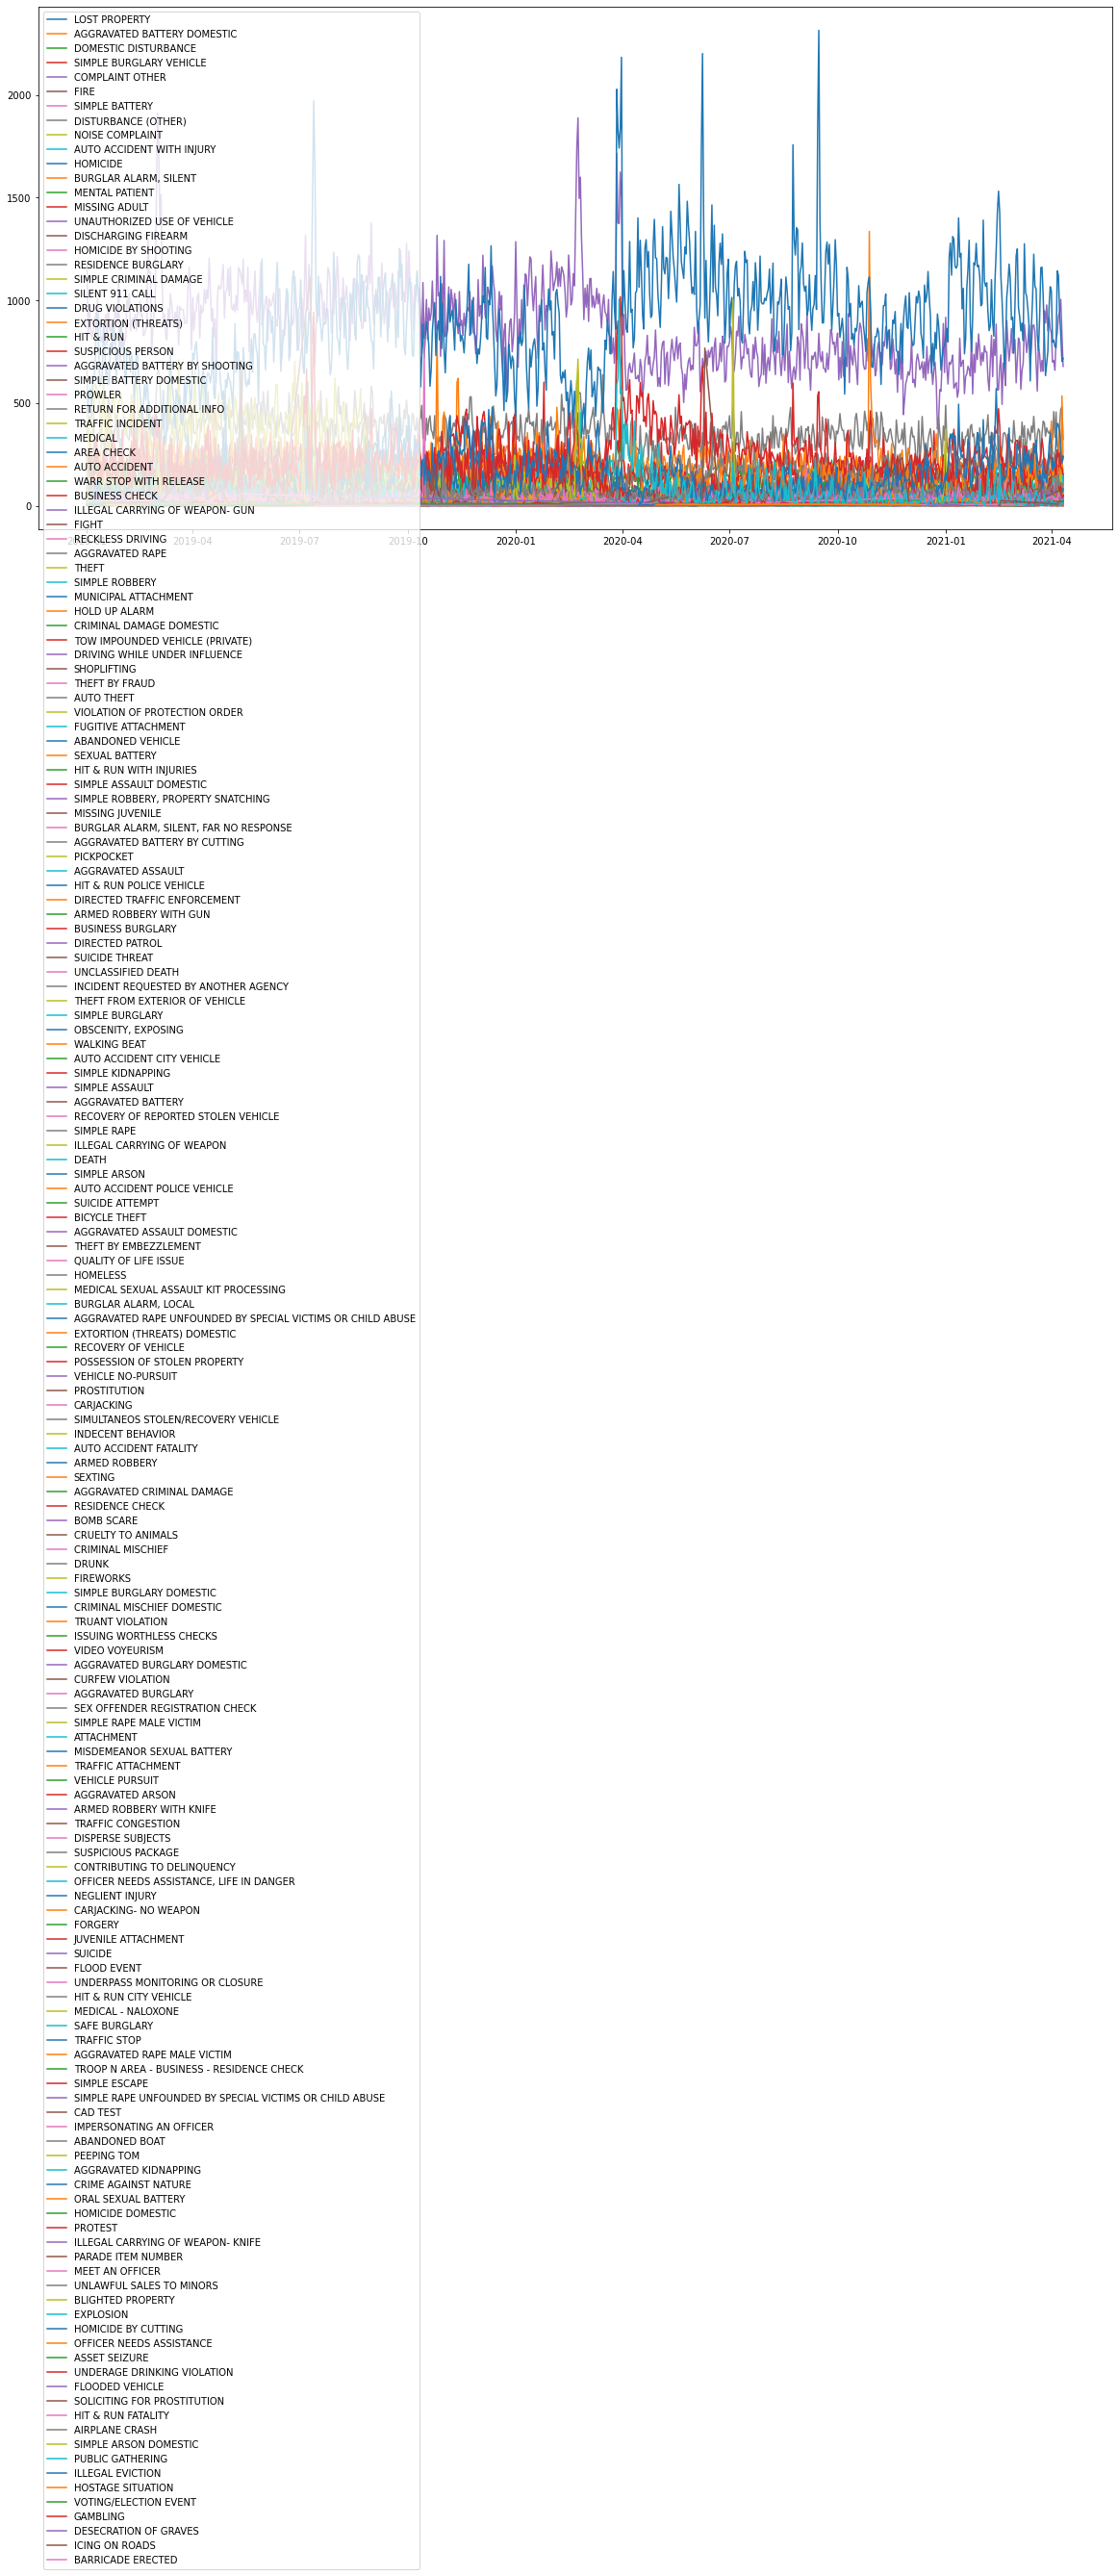

In [6]:
#plotting frequency of all types of crime from 2019-2021
#as we can see this is too messy
plt.figure(figsize=(20,10))
for key, val in crime_by_type.items():
    plt.plot(val.groupby(["TimeCreate"]).sum().iloc[:,2], label=key)

plt.legend()
plt.show()

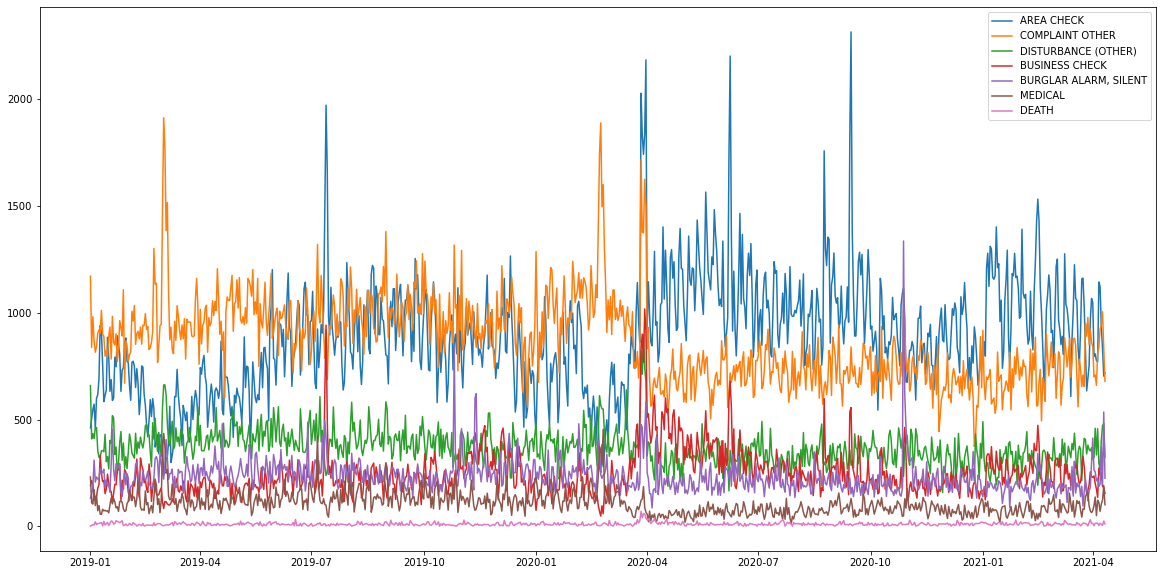

In [7]:
#here we isolate the top 5 most common crimes using our Counter() object from above
plt.figure(figsize=(20,10))
for key, val in counter.most_common(5):
    plt.plot(crime_by_type[key].groupby(["TimeCreate"]).sum().iloc[:,2], label=key)

#plotting medical and death-related calls as well as they are of interest due to covid
plt.plot(crime_by_type["MEDICAL"].groupby(["TimeCreate"]).sum().iloc[:,2], label="MEDICAL")   
plt.plot(crime_by_type["DEATH"].groupby(["TimeCreate"]).sum().iloc[:,2], label="DEATH")
plt.legend()
plt.show()

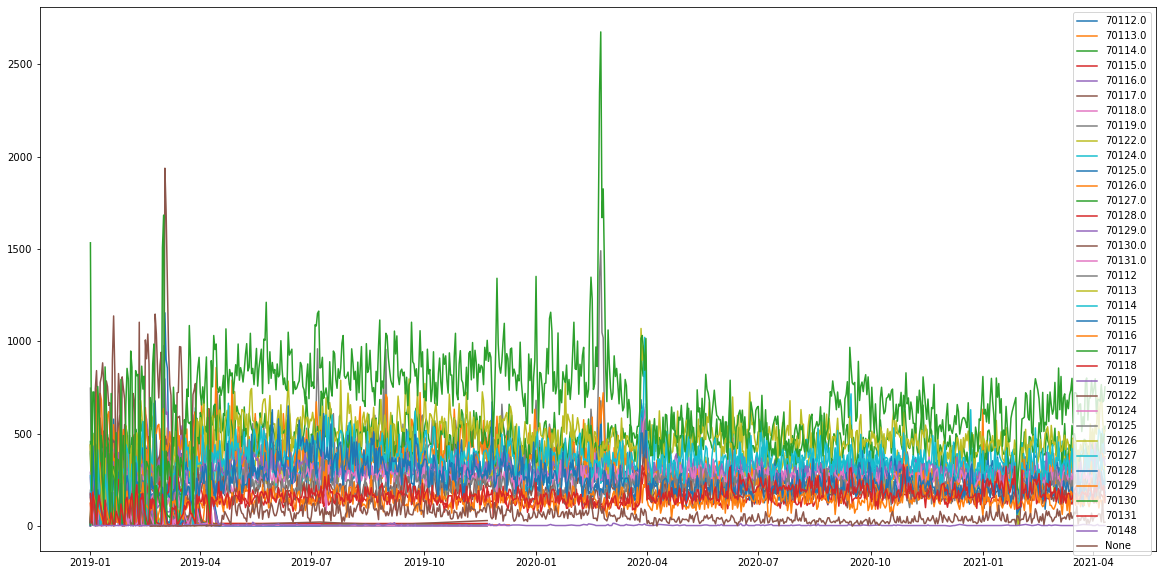

In [8]:
#get list of zipcodes
zips = crime_by_type["AREA CHECK"].groupby(["Zip"]).sum().iloc[:,2].index
#create another counter to track which zip codes have the most crime over this period
zip_counter = Counter()

#plot crime by zip code for all zips - again quite messy
plt.figure(figsize=(20,10))
for z in zips:
    zip_counter[z]=agg_cfs[agg_cfs["Zip"]==z].groupby(["Zip"]).sum().iloc[:,2].loc[z]
    plt.plot(agg_cfs[agg_cfs["Zip"]==z].groupby(["TimeCreate"]).sum().iloc[:,2], label=str(z))
plt.legend()
plt.show()


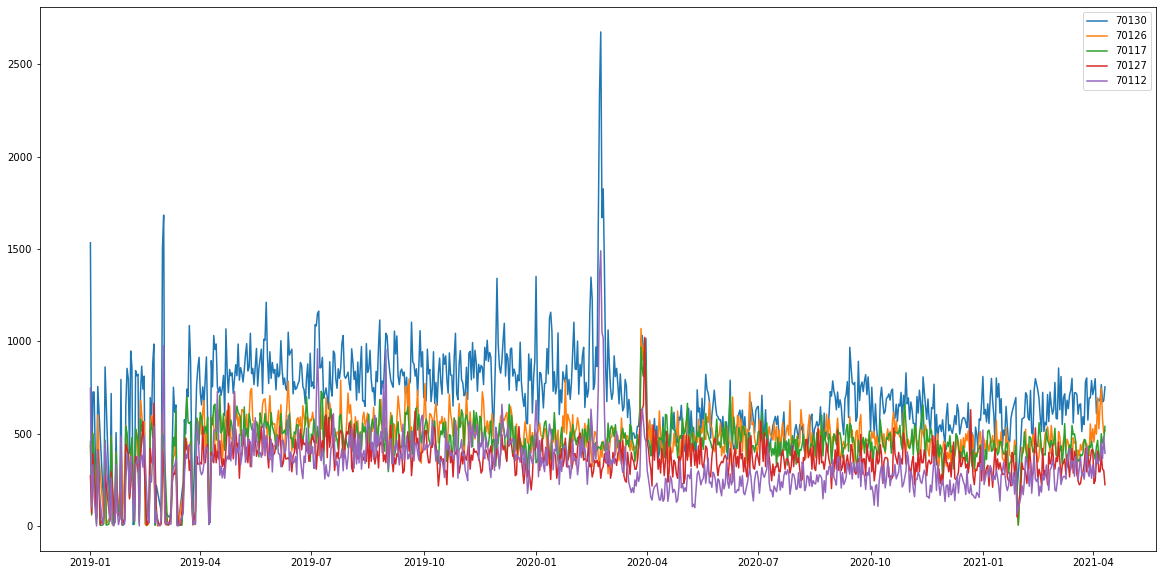

In [9]:
#again, isolate the top 5 most common zips for crime using our second Counter() object from above
plt.figure(figsize=(20,10))
for z, total in zip_counter.most_common(5):
    plt.plot(agg_cfs[agg_cfs["Zip"]==z].groupby(["TimeCreate"]).sum().iloc[:,2], label=str(z))
plt.legend()
plt.show()